In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns; sns.set(color_codes=True)

from sklearn.preprocessing import QuantileTransformer

In [2]:
store_visits = pd.read_csv('Datasets/store_visits.csv')

store_visits.sample(10)

,Visits,Revenue,StoreID
107,1065.176085,5365.880426,1
29,944.029099,4778.145498,1
54,1111.266087,5572.330435,1
246,448.209371,711.495997,0
46,1035.582877,5198.914385,1
359,458.643641,692.001749,0
323,447.200785,758.166689,0
140,893.830404,4495.152021,1
303,499.864498,714.244680,0
22,1031.964538,5170.822692,1


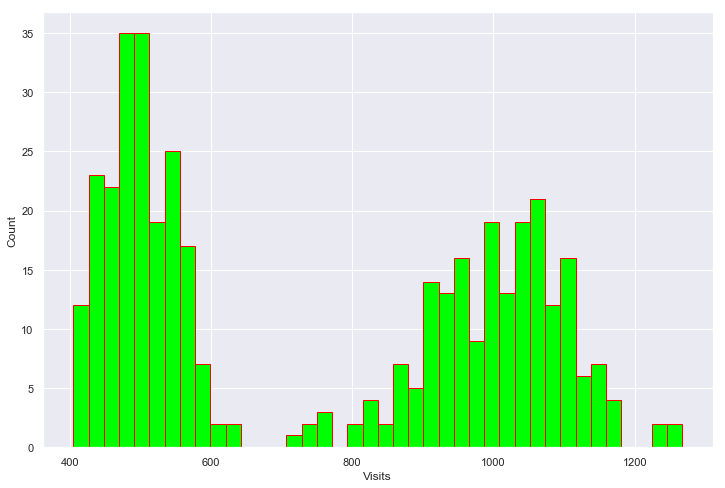

In [3]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(store_visits['Visits'], facecolor='lime', edgecolor='red', bins=40)

plt.xlabel('Visits')
plt.ylabel('Count')

plt.show()

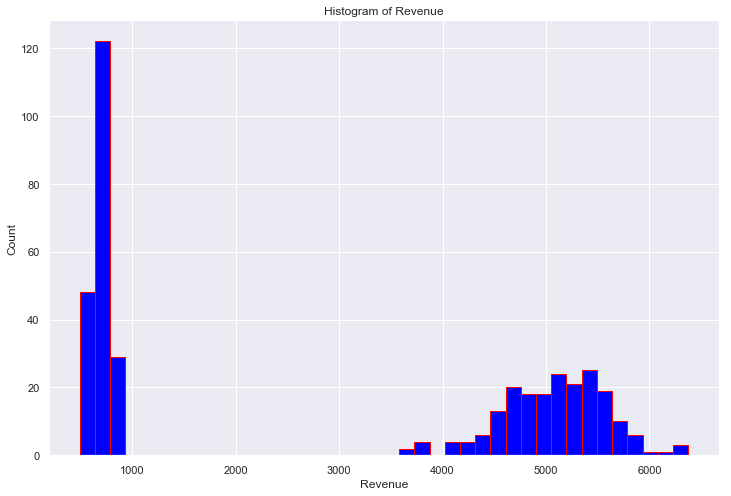

In [4]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(store_visits['Revenue'], facecolor='blue', edgecolor='red', bins=40)

plt.xlabel('Revenue')
plt.ylabel('Count')
plt.title('Histogram of Revenue')

plt.show()

In [5]:
transformer = QuantileTransformer(output_distribution='normal')

store_transform = transformer.fit_transform(store_visits[['Visits','Revenue']])

In [6]:
store_transform_df = pd.DataFrame(data = store_transform,
                                  columns=['Visits_transform', 'Revenue_transform'])
store_transform_df.head()

,Visits_transform,Revenue_transform
0,0.692537,0.733348
1,0.989320,0.989586
2,0.317696,0.336921
3,0.371256,0.432007
4,1.210072,1.236359


In [7]:
final_df = pd.concat([store_visits, store_transform_df], axis=1)

final_df.head()

,Visits,Revenue,StoreID,Visits_transform,Revenue_transform
0,1023.178663,5165.893314,1,0.692537,0.733348
1,1058.607260,5349.036298,1,0.989320,0.989586
2,935.069490,4756.347453,1,0.317696,0.336921
3,952.360965,4849.804826,1,0.371256,0.432007
4,1078.384010,5467.920052,1,1.210072,1.236359


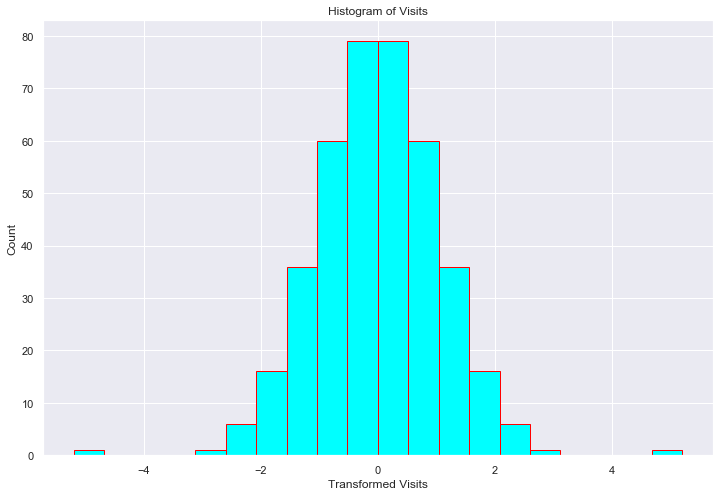

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(final_df['Visits_transform'], facecolor='cyan', edgecolor='red', bins=20)

plt.xlabel('Transformed Visits')
plt.ylabel('Count')
plt.title('Histogram of Visits')

plt.show()

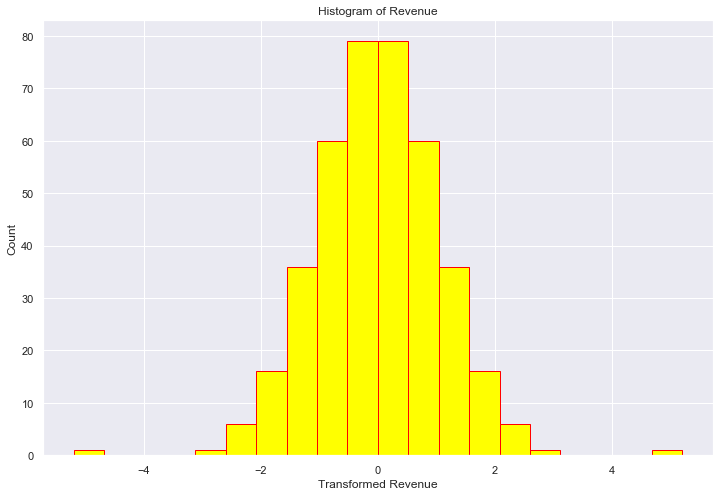

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.hist(final_df['Revenue_transform'], facecolor='yellow', edgecolor='red', bins=20)

plt.xlabel('Transformed Revenue')
plt.ylabel('Count')
plt.title('Histogram of Revenue')

plt.show()

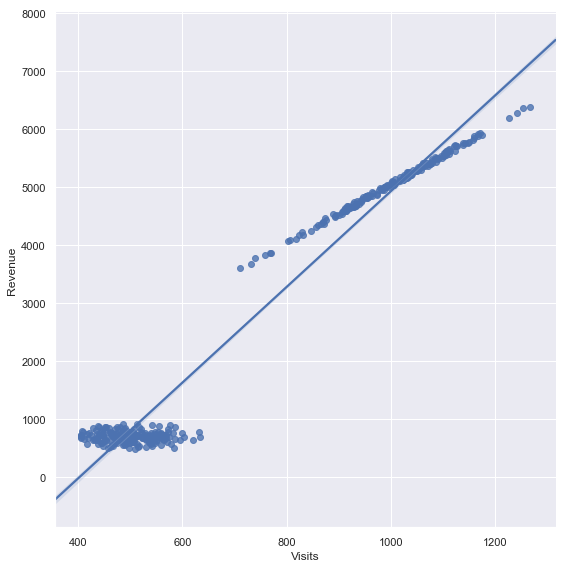

In [10]:
sns.lmplot(x="Visits", y="Revenue", data=final_df, height=8)

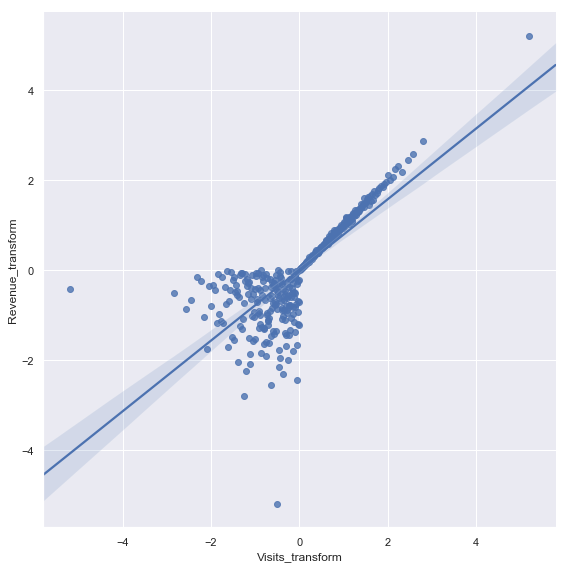

In [11]:
g = sns.lmplot(x="Visits_transform", y="Revenue_transform", data=final_df, height=8)